In [12]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import fastjet as fj
import pandas as pd

ROOT.gSystem.Load("libDelphes")

try:
    ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
    ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')
except:
    pass

fnames = ['/media/sda1/mono_W_2/Events/1m_0/tag_1_delphes_events.root',
         '/media/sda1/mono_W_2/Events/1m_1/tag_2_delphes_events.root',
         '/media/sda1/mono_W_2/Events/1m_2/tag_1_delphes_events.root']

In [13]:
chain = ROOT.TChain("Delphes")
for fname in fnames:
    chain.Add(fname)

treeReader = ROOT.ExRootTreeReader(chain)
nEntries = treeReader.GetEntries()

branchParticle = treeReader.UseBranch("Particle")
branchJet = treeReader.UseBranch("GenJet")

In [15]:
numpass = 0
passes = []

for i, entry in enumerate(range(nEntries)):
    if i%100000 == 0:
        print(i)
    treeReader.ReadEntry(entry)
    jets = branchJet
    jet = jets.At(0)

    if np.logical_and.reduce([jet.PT < 600,jet.PT > 500,np.abs(jet.Eta)<2]):
        numpass += 1
        passes += [i]

print("Number passing pT and eta cuts:", numpass)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
Number passing pT and eta cuts: 862444


In [31]:
numpass = 0
passes = []

for i, entry in enumerate(range(nEntries)):
    if i%100000 == 0:
        print(i)
    treeReader.ReadEntry(entry)
    jets = branchJet
    jet = jets.At(0)

    if np.logical_and.reduce([jet.PT < 600,jet.PT > 500,
                              np.abs(jet.Eta)<2,
                              jet.Mass >75.,jet.Mass < 110.]):
        numpass += 1
        passes += [i]

print("Number passing pT and eta cuts:", numpass)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
Number passing pT and eta cuts: 602055


In [30]:
jet.Mass

308.41021728515625

In [32]:
#nEntries=12
numparticles_pre = np.zeros(numpass)
numparticles_post = np.zeros(numpass)

masses = np.zeros(numpass)
masses2 = np.zeros(numpass)
pTs = np.zeros(numpass)
etas = np.zeros(numpass)

jet_def = fj.JetDefinition(fj.antikt_algorithm, 0.07)

# pt, eta, phi, m
out_data = np.zeros((numpass,50,4))

for i, entry in enumerate(passes):
    if i%10000 == 0:
        print(i, "of", numpass)
    treeReader.ReadEntry(entry)
    jets = branchJet
    jet = jets.At(0)
    
    etas[i] = jet.Eta
    masses[i] = jet.Mass
    pTs[i] = jet.PT
    
    parts = jet.Constituents
    numparticles_pre[i] = parts.GetEntries()
    
    parts_pj = []
    for part in parts:
        parts_pj += [fj.PseudoJet(part.Px,part.Py,part.Pz,part.E)]
    sequence = fj.ClusterSequence(parts_pj,jet_def)
    reclustered = fj.sorted_by_pt(sequence.inclusive_jets(ptmin=0.))
    
    newjet = fj.PseudoJet()
    for j in range(min(50,len(reclustered))):
        newjet += reclustered[j]
    masses2[i] = newjet.m()
    
                   
    numparticles_post[i] = len(reclustered)    
    
    
    
    numparts = min(50,len(reclustered))
    for j in range(numparts):
        particle = reclustered[j]
        out_data[i,j,0] = particle.pt()
        out_data[i,j,1] = particle.eta()
        out_data[i,j,2] = particle.phi() - np.pi
        out_data[i,j,3] = particle.E()
        
    for j in range(numparts,50):
        out_data[i,j,1] = jet.Eta
        out_data[i,j,2] = jet.Phi

0 of 602055
10000 of 602055
20000 of 602055
30000 of 602055
40000 of 602055
50000 of 602055
60000 of 602055
70000 of 602055
80000 of 602055
90000 of 602055
100000 of 602055
110000 of 602055
120000 of 602055
130000 of 602055
140000 of 602055
150000 of 602055
160000 of 602055
170000 of 602055
180000 of 602055
190000 of 602055
200000 of 602055
210000 of 602055
220000 of 602055
230000 of 602055
240000 of 602055
250000 of 602055
260000 of 602055
270000 of 602055
280000 of 602055
290000 of 602055
300000 of 602055
310000 of 602055
320000 of 602055
330000 of 602055
340000 of 602055
350000 of 602055
360000 of 602055
370000 of 602055
380000 of 602055
390000 of 602055
400000 of 602055
410000 of 602055
420000 of 602055
430000 of 602055
440000 of 602055
450000 of 602055
460000 of 602055
470000 of 602055
480000 of 602055
490000 of 602055
500000 of 602055
510000 of 602055
520000 of 602055
530000 of 602055
540000 of 602055
550000 of 602055
560000 of 602055
570000 of 602055
580000 of 602055
590000 of 6

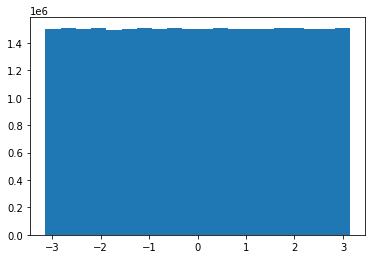

In [33]:
plt.hist(out_data[:,:,2].flatten(),bins=20)
plt.show()

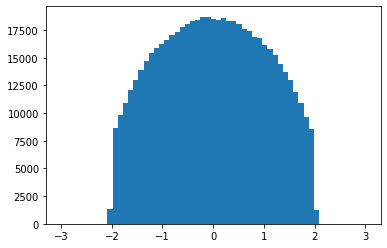

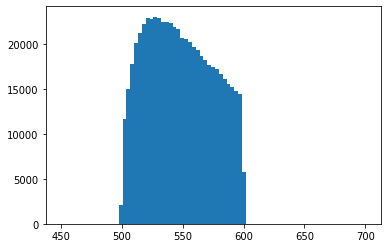

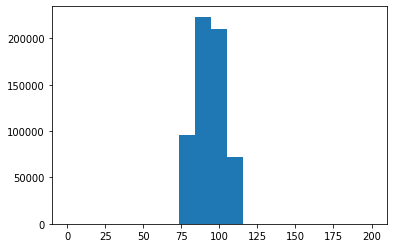

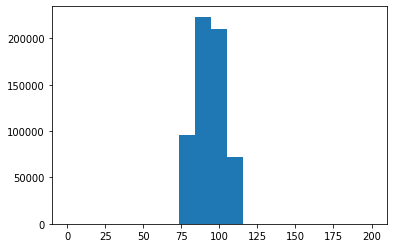

In [34]:
plt.hist(etas,bins=np.linspace(-3,3,60))
plt.show()
plt.hist(pTs,bins=np.linspace(450,700,80))
plt.show()
plt.hist(masses,bins=np.linspace(0,200,20))
plt.show()
plt.hist(masses2,bins=np.linspace(0,200,20))
plt.show()

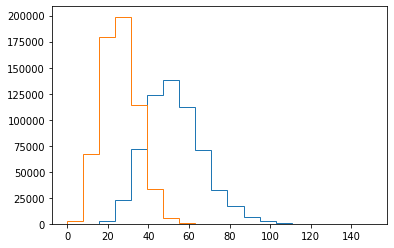

In [39]:
plt.hist(numparticles_pre,histtype='step',bins = np.linspace(0,150,20))
plt.hist(numparticles_post,histtype='step',bins = np.linspace(0,150,20))
plt.show()

In [36]:
out_data = out_data.reshape((-1,50*4))

In [40]:
columns = []
for i in range(50):
    columns += ['pT' + str(i), 'eta' + str(i), 'phi' + str(i), 'E' + str(i)]

In [41]:
outstore = pd.HDFStore("/home/jcollins/projects/EMD_VAE/in_data/monoW-data-3.h5")
dictionary = dict(zip(columns, out_data.T))
out_df = pd.DataFrame(dictionary,columns=columns)
outstore.append('particles',out_df)
outstore.close()
